<a href="https://colab.research.google.com/github/isabelbrandao/sigmoidal_data_science/blob/main/DSNP40/EDA_Pandas/working_prj_Analysis_of_Amsterdam_Airbnb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*Exercise template given by [sigmoidal.ai](https://sigmoidal.ai)* and solved by Isabel Brandao

---

# Analysis of Airbnb data in - *Amsterdam*

[Airbnb](https://www.airbnb.com.br/) is already considered **the largest hotel company of our time**, with a unique twist **it doesn't own any hotels**!

Airbnb connects people looking to travel and find accommodations with hosts who want to rent out their properties in a convenient manner, providing an innovative platform for alternative lodging.

As of the end of 2018, this startup, founded a decade ago, had already **accommodated over 300 million** people globally, challenging traditional hotel chains.

One of Airbnb's notable initiatives is to provide data from its platform, for various major cities worldwide. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, you can access a wealth of data to develop *Data Science* projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will explore the data specific to the city of Amsterdam, with the goal of revealing valuable insights from the raw data.**

## Accessing the Airbnb Data


In [2]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import data listings.csv into a DataFrame
df_ams = pd.read_csv("/content/drive/MyDrive/Data_science_stuff/data/listings_ams.csv")


## Data Analysis


**description of the variables**

* id - Airbnb's unique identifier for the listing
* name - Name of the listings
* host_id - Airbnb's unique identifier for the host/user.
* host_name - Name of the host. Usually just the first name(s)
* neighbourhood_group - this column doesn't show valid values
* neighbourhood - district
* latitude - Uses the World Geodetic System (WGS84) projection for latitude

* longitude - Uses the World Geodetic System (WGS84) projection for longitude
* room_type - type of room: home/apt/private room/shared room/hotel
* price - daily price in local currency
* minimum_nights - minimum number of night stay for the listing
* number_of_reviews - The number of reviews the listing has
* last_review - he date of the first/oldest review
* reviews_per_month - The number of reviews the listing has (in the last 30 days)
* calculated_host_listing_count - The number of listings from the same host
* availability_365 - The availability of the listing within 365 days
* license - the license/permit/registration


**Before initiating any analysis, let's begin by examining the initial entries in our *dataset*. We will review the first 5 entries to get sense of the data.**

In [6]:
# Showing the first 5 rows
df_ams.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,NaN,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,NaN,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,NaN,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43,036396BE30827DDB9575
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,NaN,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,NaN,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110,0363 8C61 E9B9 5582 913E


### **Q1. How many variables and inputs are there in our dataset, and what are the types of these variables?**
 Let's proceed to find out the number of entries in our dataset and examine the data types for each column.
 It's worth noting that the dataset we've acquired is the "summarized" version of the Airbnb data for Amsterdam.
 There is also a more extensive version available, which can be found in the **listings.csv.gz** file on the same page where we downloaded this dataset.


The quality of a dataset is directly related to the quantity of missing values.
It's important to understand early on whether these **null** values are significantly compared to the total number of entries.

In [7]:
# identifying the size of our DataFrame
print("Input:\t {}".format(df_ams.shape[0]))
print("Variables:\t {}".format(df_ams.shape[1]))

# checking the first 5 entries of the DataFrame
display(df_ams.dtypes)

Input:	 8386
Variables:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. What is the percentage of *NULL* values in the *dataset*?**


In [8]:
# Sorting variables in descending order by their missing values
(df_ams.isnull().sum() / df_ams.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.098974
last_review                       0.098974
license                           0.002146
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

It can be seen that the column **neighbourhood_group** has 100% of its values missing.
The variables **reviews_per_month** and **last_review** have only 10% of missing values.
Only **2%** are licensed accomodations? Curious! check it further...

### **Q3. What is the distribution type of the variables?**

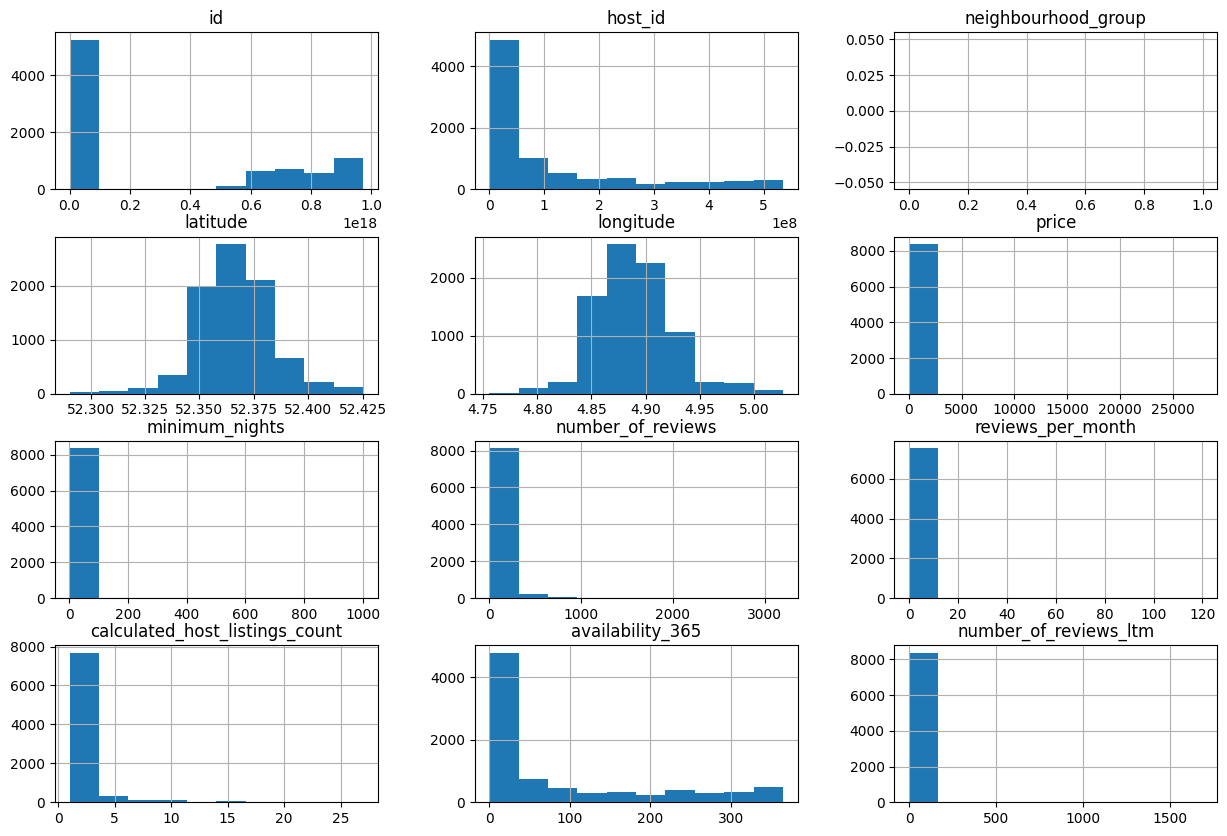

In [9]:
# Plotting histogram with variables
df_ams.hist(bins=10, figsize=(15,10));

### **Q4. What is the average rent price?**

In [10]:
# Checking the statistical summary for **numerical variables**
df_ams[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8386.000000,8386.000000,8386.000000,7556.000000,8386.000000,8386.000000
mean,254.489864,5.046625,45.437753,1.175696,1.831624,82.825066
std,395.468275,34.710395,107.352805,2.253706,2.857336,113.568083
min,18.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,2.000000,3.000000,0.270000,1.000000,0.000000
50%,207.000000,3.000000,10.000000,0.580000,1.000000,18.000000
75%,300.000000,4.000000,36.000000,1.240000,1.000000,142.000000
max,27857.000000,1001.000000,3199.000000,120.110000,27.000000,365.000000


# From the statistical summary, we can make the following assumptions:

* The variable `price` has 75% of its values below 300, however, its maximum value is 8386.
* The mean of `minimum_nights` is about 5 days.


### **Q4. What is the correlation between the variables?**

Correlation indicates a connection between two factors. In our case, we're seeking a link or similarity between two variables.
This connection can be quantified, and the correlation coefficient helps determine its strength. To uncover relationships between the variables we're interested in:

1. Construct a correlation matrix.
2. Visualize this matrix using a heatmap, using `Seaborn` library.

In [11]:
# Correlation matrix - only works for numerical variables

corr = df_ams[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003496,-0.072651,-0.075372,0.004016,0.104383
minimum_nights,-0.003496,1.000000,-0.018017,-0.023060,0.027488,-0.006870
number_of_reviews,-0.072651,-0.018017,1.000000,0.728991,0.029863,0.167279
reviews_per_month,-0.075372,-0.023060,0.728991,1.000000,0.095792,0.218077
calculated_host_listings_count,0.004016,0.027488,0.029863,0.095792,1.000000,0.279274
availability_365,0.104383,-0.006870,0.167279,0.218077,0.279274,1.000000


Text(77.78159722222226, 0.5, '')

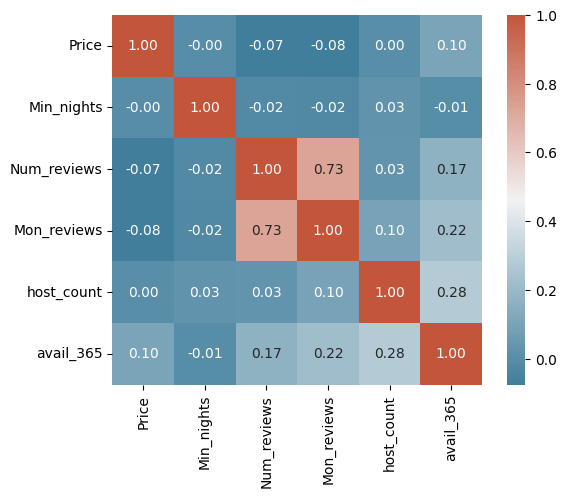

In [17]:
# Correlations as heatmap
# Generating a custom colormap (cmap)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, fmt='.2f', square=True,linecolor='black', annot=True);

# renaming xticks and yticks

yticks_labels = ['Price','Min_nights','Num_reviews','Mon_reviews','host_count',
                 'avail_365']
xticks_labels = ['Price','Min_nights','Num_reviews','Mon_reviews','host_count',
                 'avail_365']

plt.xticks(np.arange(6) + .5, labels=xticks_labels)
plt.yticks(np.arange(6) + .5, labels=yticks_labels)



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
